In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


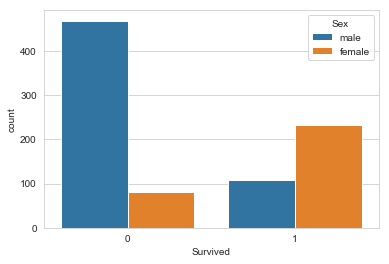

In [5]:
sns.countplot(x='Survived', hue='Sex', data=df)

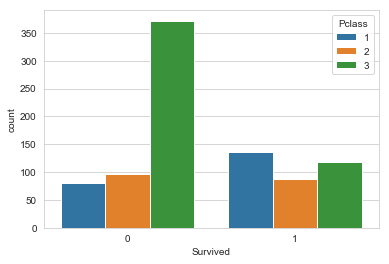

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=df)

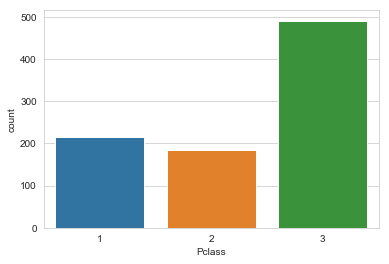

In [7]:
sns.countplot(x='Pclass',data=df)

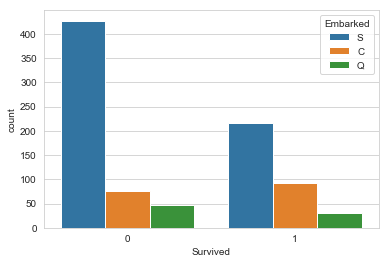

In [8]:
sns.countplot(x='Survived',hue='Embarked',data=df)

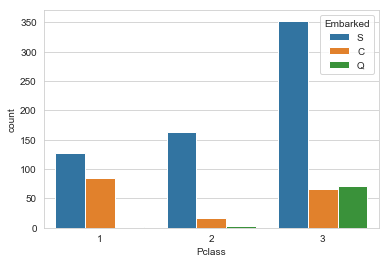

In [9]:
sns.countplot(x='Pclass',hue='Embarked',data=df)

In [10]:
df[df['Sex']=='male'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [11]:
# 3 columns with null values:
    # age
    # cabin
    # embarked
    
# Need to figure out how many null values we have and if we can insert real values into them

In [12]:
# Figuring out how many null values are in age:

df[df['Age'].isnull()].describe()

# there are 177 null values for age out of 891 total people - about 20% of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [13]:
# Null values for embarked = 2

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
# Null values for cabin = 687 or ~77% of the dataset

df[df['Cabin'].isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,687.000000,687.000000,687.000000,529.000000,687.000000,687.000000,687.000000
mean,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325
std,259.215905,0.458528,0.589602,13.472634,1.207492,0.827106,28.663343
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.877100
50%,441.000000,0.000000,3.000000,26.000000,0.000000,0.000000,10.500000
75%,664.500000,1.000000,3.000000,35.000000,1.000000,0.000000,23.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [15]:
# Can I do anything about null values for cabin?

    # put a pin in it
    
    # just replace with most popular embarked site which is S

In [16]:
# Dealing with null values for embarked:

df['Embarked'].fillna(value='S',inplace=True)

In [17]:
# Check if worked

df[df['Embarked'].isnull() == True]

# success

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
# Creating a title column

df['Title'] = df['Name'].apply(lambda name: name.split(',')[1])
df['Title'] = df['Title'].apply(lambda title: title.split()[0])

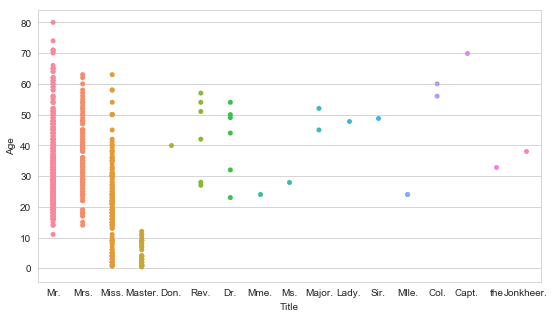

In [19]:
# Check if relationship btwn title and age
plt.figure(figsize=(9, 5))

sns.stripplot(x='Title',y='Age',jitter=False,data=df)


In [20]:
# okay ... there does appear to be a relationship between title and age so it is probably worth it to do something meaningful with this column

In [21]:
# Fixing Title column

df['Title'].value_counts()


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Capt.          1
Mme.           1
Ms.            1
Jonkheer.      1
Lady.          1
Sir.           1
the            1
Don.           1
Name: Title, dtype: int64

In [22]:
title_dict = {'Mr.':'Mr',
              'Miss.':'Miss',
              'Mrs.':'Mrs',
              'Master.':'Master',
              'Dr.':'Professional',
             'Rev.':'Professional',
             'Mlle.':'Miss',
             'Col.':'Professional',
             'Major.':'Professional',
             'Capt.':'Professional',
             'Ms.':'Mrs',
             'the':'Nobility',
             'Sir.':'Nobility',
             'Mme.':'Mrs',
             'Don.':'Nobility',
             'Lady.':'Nobility',
             'Jonkheer.':'Nobility'
             }

# note: mapped 'the' to nobility because, upon inspection, the actual honorific is "Countess"

In [23]:
# Create more concise and meaningful title column

df['Title'] = df['Title'].map(title_dict)

In [24]:
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

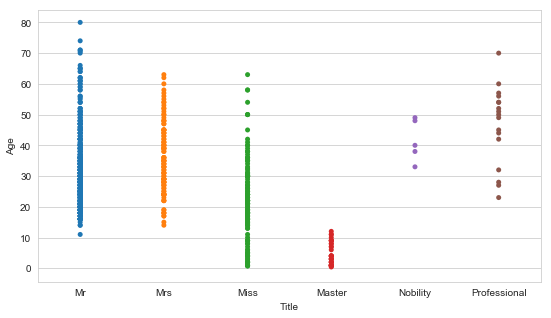

In [25]:
# Check if relationship btwn title and age
plt.figure(figsize=(9, 5))

sns.stripplot(x='Title',y='Age',jitter=False,data=df)

In [26]:
# Biggest takeaway from title and age column is that masters are under 12

    # when filling age column nulls will fill the masters with median of masters before filling in the rest of the age values as I did previously
    # will also separately fill nobility and professional missing age median of those

In [27]:
# Check if there's relationship between class and age

    # use this to fill in missing age values
    

/Users/analeegraig/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


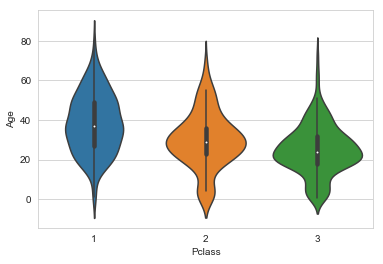

In [28]:
sns.violinplot(x='Pclass',y='Age',data=df)

# not much variance for the ages of 3rd class individual (could be because most missing datapoints are from 3rd class age)

/Users/analeegraig/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


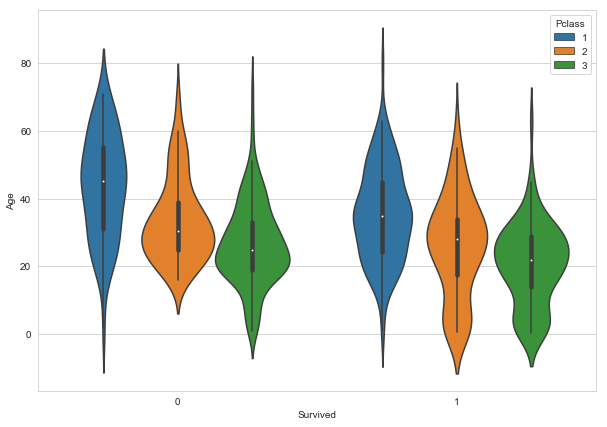

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(x='Survived',y='Age',hue='Pclass',data=df)

# those who survived were typically younger in their particular class
    # this effect seems the most dramatic in first class
    # this effect could also be due partially to the fact that women were typically younger and
        # survived at higher rates

In [30]:


# Before I fill in null age values I want to fill in missing age values for masters, nobility and professionals



In [31]:
# Filling in age for masters

df.loc[df['Age'].isnull() & (df['Title'] == 'Master'), 'Age'] = df.loc[(df['Title'] == 'Master'), 'Age'].median()

# For nobility

df.loc[df['Age'].isnull() & (df['Title'] == 'Nobility'), 'Age'] = df.loc[(df['Title'] == 'Nobility'), 'Age'].median()

# For professionals

df.loc[df['Age'].isnull() & (df['Title'] == 'Professional'), 'Age'] = df.loc[(df['Title'] == 'Professional'), 'Age'].median()

In [32]:
# Check that it worked

df[(df['Title'] == 'Master') & (df['Age'].isnull() == True)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [33]:
# Checking relationship between age and class for men in 1st class:

df[(df['Pclass'] == 1) & (df['Sex'] == 'male')].describe()

    # Take away:
        # median close to mean --> 
            # fill in with 40.5
            

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,122.000000,122.000000,122.0,102.000000,122.000000,122.000000,122.000000
mean,455.729508,0.368852,1.0,41.366863,0.311475,0.278689,67.226127
std,247.026449,0.484484,0.0,15.089150,0.546695,0.658853,77.548021
min,7.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,255.500000,0.000000,1.0,30.250000,0.000000,0.000000,27.728100
50%,480.500000,0.000000,1.0,41.000000,0.000000,0.000000,41.262500
75%,660.750000,1.000000,1.0,50.750000,1.000000,0.000000,78.459375
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [34]:
# Filling in male, 1st class age with median:

df.loc[df['Age'].isnull() & (df['Sex'] == 'male') & (df['Pclass'] == 1), 'Age'] = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 1), 'Age'].median()

In [35]:
# Checking to see if it worked:

df[(df['Pclass'] == 1) & (df['Sex'] == 'male') & (df['Age'].isnull())]

    # success

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [36]:
# Update age column for 2nd class men

df.loc[df['Age'].isnull() & (df['Sex'] == 'male') & (df['Pclass'] == 2), 'Age'] = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 2), 'Age'].mean()

In [37]:
# Check it works:

df[(df['Pclass'] == 2) & (df['Sex'] == 'male') & (df['Age'].isnull())]

# success

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [38]:
# Update missing age of 3rd class men:

df.loc[df['Age'].isnull() & (df['Sex'] == 'male') & (df['Pclass'] == 3), 'Age'] = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 3), 'Age'].mean()

In [39]:
# check if works:

df[(df['Pclass'] == 3) & (df['Sex'] == 'male') & (df['Age'].isnull())]

# success

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [40]:
# Update missing age for 1st class women:

df.loc[df['Age'].isnull() & (df['Sex'] == 'female') & (df['Pclass'] ==1), 'Age'] = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 1), 'Age'].median()

In [41]:
# Check: 

df[(df['Pclass'] == 1) & (df['Sex'] == 'female') & (df['Age'].isnull())]

# success

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [42]:
# Update age for 2nd class women:

df.loc[df['Age'].isnull() & (df['Sex'] == 'female') & (df['Pclass'] ==2), 'Age'] = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 2), 'Age'].median()

In [43]:
# Check

df[(df['Pclass'] == 1) & (df['Sex'] == 'female') & (df['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [44]:
# update missing age for 3rd class women:

df.loc[df['Age'].isnull() & (df['Sex'] == 'female') & (df['Pclass'] == 3), 'Age'] = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 3), 'Age'].median()

In [45]:
# check

df[(df['Pclass'] == 1) & (df['Sex'] == 'female') & (df['Age'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [46]:
# Investigating Relationship between survival and family size:

In [47]:
df['Family Size'] = df['SibSp'] + df['Parch']

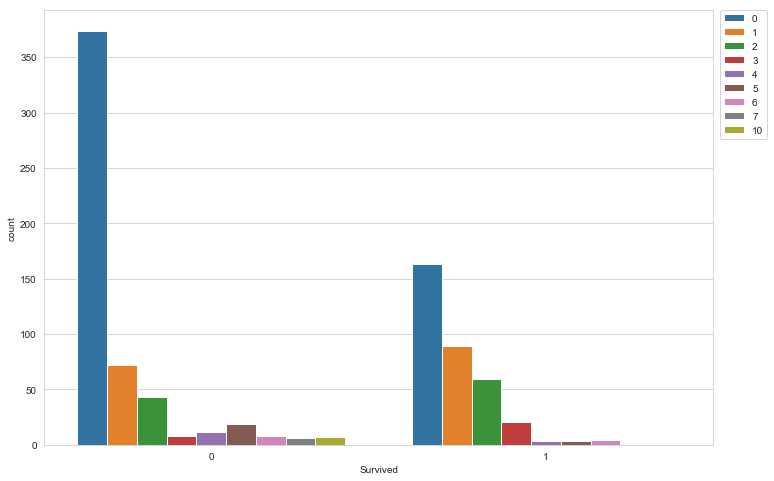

In [48]:
plt.figure(figsize=(12,8))

sns.countplot(x='Survived',hue='Family Size',data=df)

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

In [49]:
df['Family present'] = df['Family Size'] > 0

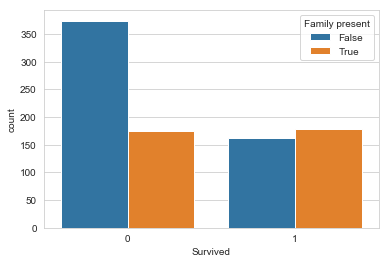

In [50]:
sns.countplot(x='Survived',data=df,hue='Family present')

    # family present matters --> those with family aboard survived at a higher rate than those without

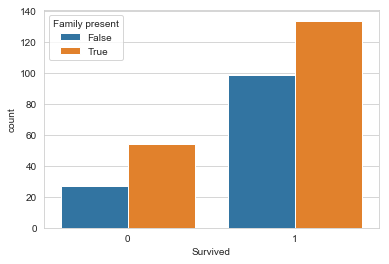

In [51]:
sns.countplot(x='Survived',data=df[df['Sex'] == 'female'],hue='Family present')

# for women the effect of family members aboard on survival doesn't seem significant

# what's a good way to isolate this relationship?

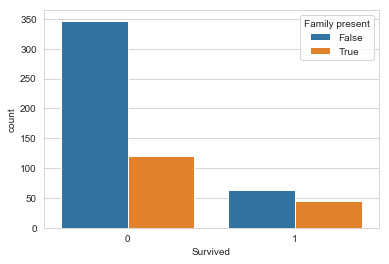

In [52]:
sns.countplot(x='Survived',data=df[df['Sex'] == 'male'],hue='Family present')

# men with family members on board died at a lower rate than men without families aboard

/Users/analeegraig/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


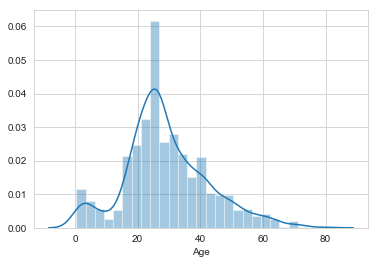

In [53]:
sns.distplot(df['Age'])

# not a ...super weird distribution plot. it .... vaguely makes sense.

In [54]:
df['Age'].describe()

count    891.000000
mean      29.173166
std       13.414228
min        0.420000
25%       21.500000
50%       26.149494
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [55]:
# Investigating cabin column

In [56]:
df['Cabin'].value_counts().head()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
Name: Cabin, dtype: int64

In [57]:
df['Has Cabin'] = df['Cabin'].isnull() == False

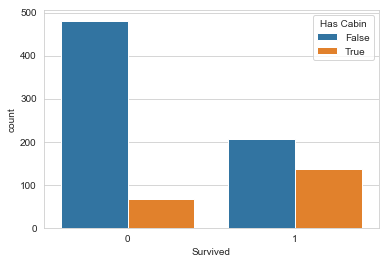

In [58]:
sns.countplot(x='Survived',hue='Has Cabin',data=df)

# seems like there is a relationship between having a cabin and surival (possibly related to class)

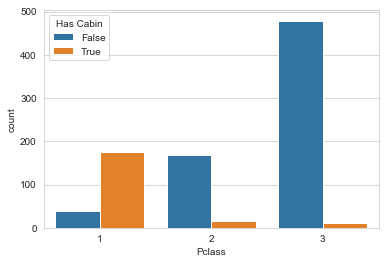

In [59]:
sns.countplot(x='Pclass',hue='Has Cabin',data=df)

# Yeah, first class people have a cabin at a much, much higher rate then any other class
    # kind of interesting that 2nd class people don't seem to have a huge rate of having cabins

In [60]:
df_male_pclass3 = pd.DataFrame(df[(df['Pclass'] == 3) & (df['Sex'] == 'male')])

In [61]:
df_male_pclass3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Family present,Has Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,1,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,0,False,False
5,6,0,3,"Moran, Mr. James",male,26.149494,0,0,330877,8.4583,NaN,Q,Mr,0,False,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master,4,True,False
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.0500,NaN,S,Mr,0,False,False


/Users/analeegraig/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


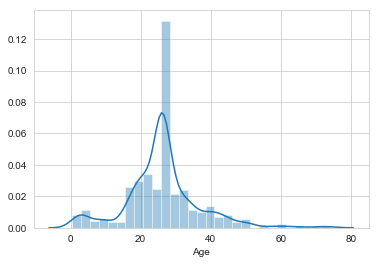

In [62]:
# Does this just look super weird for a distribution? The KDE looks ... sort of normal

sns.distplot(df_male_pclass3['Age'])

In [63]:
# Convert categorical features into dummy variables:

In [64]:
title = pd.get_dummies(df['Title'],drop_first=True)

In [65]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [66]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [67]:
pclass = pd.get_dummies(df['Pclass'],drop_first=True)

In [68]:
df = pd.concat([df,embark,pclass,sex,title],axis=1)

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,2,3,male,Miss,Mr,Mrs,Nobility,Professional
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,1,1,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,1,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,1,1,0,1,0,0,0


In [70]:
df.drop(['PassengerId','Name','Ticket','Embarked','Cabin','Title','Family Size','Pclass','Sex','Family present'],axis=1,inplace=True)

In [71]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Has Cabin,Q,S,2,3,male,Miss,Mr,Mrs,Nobility,Professional
0,0,22.0,1,0,7.2500,False,0,1,0,1,1,0,1,0,0,0
1,1,38.0,1,0,71.2833,True,0,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,False,0,1,0,1,0,1,0,0,0,0
3,1,35.0,1,0,53.1000,True,0,1,0,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,False,0,1,0,1,1,0,1,0,0,0


In [72]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [73]:
# Run model

In [74]:
from sklearn.cross_validation import train_test_split

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [76]:
from sklearn.linear_model import LogisticRegression

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [77]:
logmodel = LogisticRegression()

In [78]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
predictions = logmodel.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       154
          1       0.84      0.69      0.76       114

avg / total       0.82      0.81      0.81       268



In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
print(confusion_matrix(y_test,predictions))

[[139  15]
 [ 35  79]]


In [84]:
# Making AUC and ROC curve

In [85]:
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
import random

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Area under the ROC curve : 0.900181


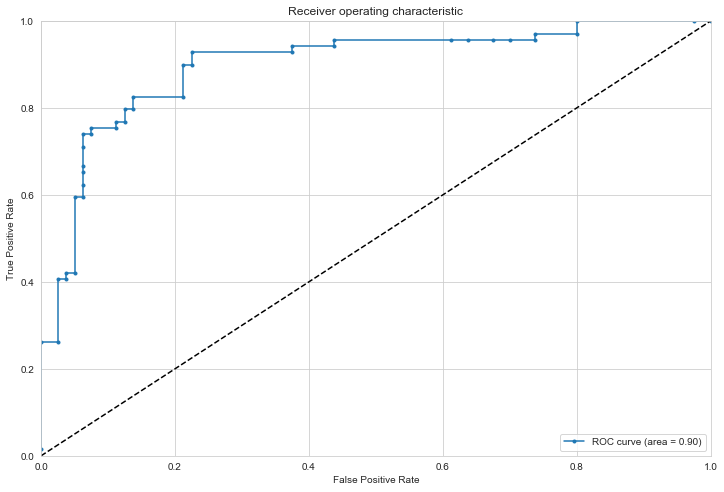

In [86]:
# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
plt.figure(figsize=(12,8))
generate_ROCplot(fpr,tpr,'LR',roc_auc)